# Raw data
--------------
## first check the raw data

In [4]:
# check how many lines
! wc -l data/emojitweets-01-04-2018.txt

18866900 data/emojitweets-01-04-2018.txt


In [2]:
# check how many words
! wc -w data/emojitweets-01-04-2018.txt

209430000 data/emojitweets-01-04-2018.txt


In [3]:
# On average the sentense are have 11 words
209430000/18866900

11.100392751326398

In [15]:
# check how many lines
! wc -l emoji_train.txt

15093520 emoji_train.txt


In [13]:
# check how many words
! wc -w emoji_train.txt

166721276 emoji_train.txt


## Train - test - validation split

In [6]:
# split on 80-10-10
18866900 * 0.8, 18866900 * 0.1, 18866900 * 0.2

(15093520.0, 1886690.0, 3773380.0)

In [8]:
! head -15093520 data/emojitweets-01-04-2018.txt >>emoji_train.txt


In [14]:
! (tail -3773380 data/emojitweets-01-04-2018.txt | head -1886690) >> emoji_val.txt

tail: error writing 'standard output': Broken pipe


In [10]:
! tail -1886690 data/emojitweets-01-04-2018.txt >> emoji_test.txt

In [1]:
# generate small_sample
! head -1509352 data/emoji_train.txt >> data/emoji_ss.txt

# Data processing

In [1]:
# Python program to generate word vectors using Word2Vec 
  
# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec

from src.helper import *

import pandas as pd
import numpy as np
import pickle

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [12]:
# import for applying stemmer (abandon)

# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer


In [5]:
# loading raw data for 1st time
filename = "emoji_100k.txt"
f = data_input_preprocess(filename)
data = data_tokenize(f)

In [2]:
# for loading existing file
sample = open("data/emoji_train_2.txt", "r") 
f = sample.read()

In [24]:
data = data_tokenize(f)

## stemmer (abandon since no improvement)


In [14]:
# # import stopwords
# stop = set(stopwords.words('english'))
# # remove stop words and snowball stemmer
# out = [[word for word in words if word not in stop] for words in data]
# snowball = SnowballStemmer('english')
# docs_snowball = [[snowball.stem(word) for word in words] for words in out]

save emoji list

In [10]:
# emoji_list = list(emoji_set)
# with open("emoji_list.csv", 'w', newline='') as myfile:
#      w = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#      w.writerow(emoji_list)

4358

In [ ]:
# with open("emoji_list.csv", 'r', newline='') as myfile:
#      emoji_list = csv.reader(myfile, quoting=csv.QUOTE_ALL)

# more EDA


In [3]:
from collections import Counter
# word frequency
c = Counter(f.split(" "))

# emoji_freq
emoji_frequency = {}

In [4]:
total = 0
for emoji in emoji_list:
    emoji_frequency[emoji] = c[emoji]
    total += c[emoji]    

sort_freq = {k: v for k, v in sorted(emoji_frequency.items(), key=lambda item: item[1], reverse=True)}

In [6]:
total/166721276/1.201, 166721276/15093520, total/15093520

(0.25408386196972943, 11.04588432651893, 3.3707037192119533)

In [7]:
non_zero_count = 0
count = 0
for key, value in sort_freq.items():
    count += 1
    if value > 0:
        non_zero_count += 1
        

In [20]:
count, non_zero_count

(4168, 1436)

In [21]:
c.most_common(15)

[('', 44706401),
 ('😂', 3854531),
 ('️', 3346541),
 ('the', 3192842),
 ('to', 2989458),
 ('I', 2444503),
 ('a', 2214287),
 ('you', 2204821),
 ('and', 1909798),
 ('for', 1678449),
 ('is', 1537748),
 ('😭', 1510286),
 ('in', 1461812),
 ('of', 1407524),
 ('my', 1365761)]

In [8]:
k = Counter(sort_freq) 
k.most_common(20)  

[('😂', 3854531),
 ('😭', 1510286),
 ('❤', 1226367),
 ('🔥', 1114905),
 ('😍', 1022738),
 ('🏻', 503951),
 ('🏽', 497094),
 ('💕', 485265),
 ('🏾', 445053),
 ('🤣', 407858),
 ('👏', 394821),
 ('🏼', 372709),
 ('🙏', 368147),
 ('✨', 350633),
 ('☺', 326226),
 ('😩', 314905),
 ('👉', 296870),
 ('🙌', 279592),
 ('💖', 278501),
 ('😊', 273655)]

In [9]:
df1 = pd.DataFrame(k.most_common(20), columns=["emoji", "count"])

In [10]:
df1["freq"] = df1["count"]/total

In [11]:
df1

,emoji,count,freq
0,😂,3854531,0.075764
1,😭,1510286,0.029686
2,❤,1226367,0.024105
3,🔥,1114905,0.021914
4,😍,1022738,0.020103
5,🏻,503951,0.009906
6,🏽,497094,0.009771
7,💕,485265,0.009538
8,🏾,445053,0.008748
9,🤣,407858,0.008017


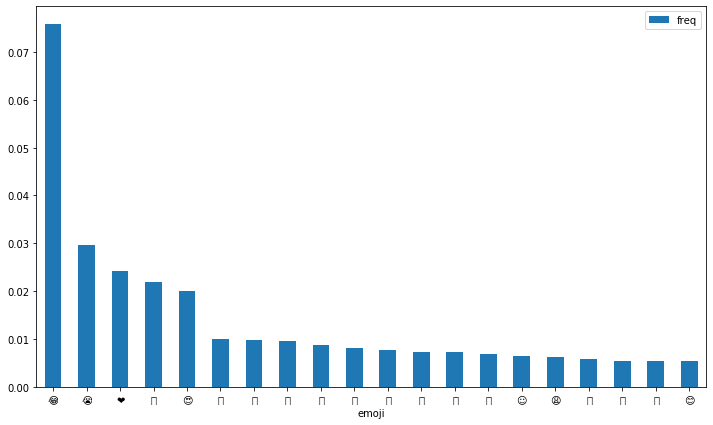

In [12]:
# df1["freq"].plot(kind="bar", figsize=(12,7))
df1.plot.bar(x='emoji', y='freq', rot=0, figsize=(12,7))

In [ ]:
# emoji position

In [45]:
count_1st = 0
count_last = 0
for sen in s.split("\n"):
    if sen:
        if sen[0] in emoji_list:
            count_1st += 1
        if sen[-1] in emoji_list:
            count_last += 1


In [49]:
count_1st,count_last,count_1st/total,count_last/total

(1489548, 8855588, 0.09920840967150586, 0.5898089905032072)

# CBOW model

In [25]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, 
                                min_count = 10,  
                                size = 300, 
                                window = 16,
                                workers= 8) 

In [26]:
# # Save CBOW model
# import pickle
# with open('cbow_2.pkl', 'wb') as f:
#     pickle.dump(model1, f)

In [13]:
# load CBOW model
import pickle
with open('cbow_2.pkl', 'rb') as f2:
    model1 = pickle.load(f2)
# print(model1_1 == model1)

In [27]:
model1.most_similar("don", topn=30)

[('doesn', 0.8186990022659302),
 ('didn', 0.8100103735923767),
 ('wouldn', 0.8088821172714233),
 ('shouldn', 0.7434371709823608),
 ('ain', 0.7348987460136414),
 ('won', 0.6777982711791992),
 ('aren', 0.665920615196228),
 ('isn', 0.665132462978363),
 ('couldn', 0.6469666361808777),
 ('can', 0.6301631927490234),
 ('wasn', 0.6123056411743164),
 ('mustn', 0.6013653874397278),
 ('•don', 0.5798691511154175),
 ('️don', 0.5744450092315674),
 ('*don', 0.5722077488899231),
 ('donâ€™', 0.5617102980613708),
 ('haven', 0.555654764175415),
 ('hmmmdon', 0.5437122583389282),
 ('needn', 0.5264298319816589),
 ('youdon', 0.5087816715240479),
 ('weren', 0.5072451829910278),
 ('havn', 0.5049401521682739),
 ('itcouldn', 0.5038918256759644),
 ('emotionscan', 0.4925376772880554),
 ('challa', 0.4911767244338989),
 ('sh💩', 0.48751020431518555),
 ('~don', 0.48375898599624634),
 ('dont', 0.4807298481464386),
 ('idon', 0.4807174503803253),
 ('hasn', 0.47658273577690125)]

# skip-gram model

In [31]:
# Create skip-gram model 
model2 = gensim.models.Word2Vec(data, 
                                min_count = 10,  
                                size = 300, 
                                window = 16,
                                sg = 1,
                                workers=8) 

In [32]:
# # Save skip-gram model
# import pickle
# with open('sg_2.pkl', 'wb') as f:
#     pickle.dump(model2, f)


In [18]:
# load skip-gram model
import pickle
with open('sg_2.pkl', 'rb') as f2:
    model2 = pickle.load(f2)


In [34]:
model2.most_similar("rainy",topn=10) == model2_2.most_similar("rainy",topn=10)

True

In [28]:
model1.most_similar("rainy",topn=10)

[('sunny', 0.6399209499359131),
 ('🌧', 0.6136183738708496),
 ('rain', 0.6078394055366516),
 ('gloomy', 0.6047894358634949),
 ('cloudy', 0.6024357080459595),
 ('chilly', 0.5894380211830139),
 ('sunnier', 0.5727637410163879),
 ('️🌧', 0.5653846859931946),
 ('snowy', 0.5630192160606384),
 ('foggy', 0.5493407249450684)]

In [56]:
model1_1.most_similar('🌧',topn=10)

[('☔️', 0.7822550535202026),
 ('rain', 0.6985459923744202),
 ('🌦', 0.6563682556152344),
 ('🌧️', 0.6422037482261658),
 ('☔', 0.5972961783409119),
 ('cloudy', 0.5852392911911011),
 ('torrential', 0.582399308681488),
 ('🌨', 0.573817253112793),
 ('⛈', 0.5628723502159119),
 ('🌧☔️', 0.5614819526672363)]

In [29]:
model1.most_similar('🍆',topn=10)

[('💦', 0.8374786972999573),
 ('👅', 0.6787562966346741),
 ('submerged', 0.6728560328483582),
 ('squirters', 0.6693689227104187),
 ('nutt', 0.6624102592468262),
 ('🍑', 0.6426915526390076),
 ('cock', 0.6353715658187866),
 ('dick🍆', 0.6352710127830505),
 ('jock', 0.6316603422164917),
 ('rimming', 0.6291654109954834)]


# Scoring

________________________________________
score test zone
            

In [30]:
score1 = word2vec_score(val_dict, model1);score1[:2] 

(0.3054485415520088, 0.5270655270655271)

In [35]:
score2 = word2vec_score(val_dict, model2);score2[:2]

(0.31370390753990096, 0.488013698630137)

In [ ]:
# baseline for ss, 0.04464

In [22]:
score1[0:2],score2[0:2]

((0.16235446313065977, 0.21978984238178634),
 (0.2128072445019405, 0.2634107285828663))

--------------------
Weighted score

In [84]:
word2vec_weighted_score(val_dict, model1, emoji_frequency)    # CBOW good at predicting more frequent word (high weight)

0.267386829730014

In [85]:
word2vec_weighted_score(val_dict, model2, emoji_frequency)    # Skip-gram good at predicting less frequent word (low weight)

0.06241611360445485

--------------------
more restriction on prediction

In [79]:
# new predictor with higher requirement to predict # emoji_prodictor_restricted
score1 = word2vec_score(val_dict, model1)
score2 = word2vec_score(val_dict, model2)

In [80]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16 and new notes / predictor sim>=0.55
# We can see improvement on accuracy but a drop in coverage
score1[0:2],score2[0:2]

((0.08711885500933417, 0.5072463768115942),
 (0.06782825140012445, 0.5647668393782384))

In [84]:
word2vec_weighted_score(val_dict, model1, emoji_frequency)

0.5681407491990289

In [85]:
word2vec_weighted_score(val_dict, model2, emoji_frequency)

0.12596177586164578

----------------------------------------------------
Model tuning history

In [36]:
# FULL TRAIN
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16, no stemmer and seperated connected
score1[0:2],score2[0:2]

((0.3054485415520088, 0.5270655270655271),
 (0.31370390753990096, 0.488013698630137))

In [ ]:
# FULL TRAIN
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16 and no stemmer

# score1[:2] (0.2809917355371901, 0.4602888086642599)
# score2[:2] (0.30413223140495865, 0.4302416212003118)

In [37]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16, no stemmer and seperated connected emojis.
# Great improvement on seperate the emojis
score1[0:2],score2[0:2]

((0.21927554980595085, 0.3115808823529412),
 (0.2632600258732212, 0.39629990262901654))

In [108]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16 and no stemmer
# Looks like stemmer does not help much
score1[0:2],score2[0:2]

((0.1630012936610608, 0.2202797202797203),
 (0.21798188874514876, 0.27897350993377484))

In [76]:
# Weighted score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16 and new notes
word2vec_weighted_score(val_dict, model1, emoji_frequency)

0.256142944437114

In [77]:
word2vec_weighted_score(val_dict, model2, emoji_frequency)

0.09182329105692395

In [27]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16 and new notes
score1[0:2],score2[0:2]

((0.16490354698195395, 0.19188993482983346),
 (0.22028624766645924, 0.2512420156139106))

In [123]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16 and new notes
score1[0:2],score2[0:2]

((0.16936488169364883, 0.19470293486041518),
 (0.22478206724782068, 0.2565742714996446))

In [104]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 16
score1[0:2],score2[0:2]

((0.16084788029925187, 0.19068736141906872),
 (0.21571072319201995, 0.25181950509461426))

In [82]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 20
score1[0:2],score2[0:2]

((0.15149625935162095, 0.17711370262390672),
 (0.21571072319201995, 0.24162011173184358))

In [77]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 150, window = 10
score1[0:2],score2[0:2]

((0.1589775561097257, 0.19480519480519481),
 (0.18952618453865336, 0.22943396226415094))

In [72]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 300, window = 10
score1[0:2],score2[0:2]

((0.17206982543640897, 0.21052631578947367),
 (0.2013715710723192, 0.2492283950617284))

In [66]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 500, window = 10
score1[0:2],score2[0:2]

((0.16521197007481297, 0.1990984222389181),
 (0.20199501246882792, 0.2577565632458234))

In [61]:
# score for CBOW and skipgram for SS WITH min_count = 5,  size = 500, window = 8
score1[0:2],score2[0:2]

((0.16390532544378697, 0.22124600638977635),
 (0.17810650887573964, 0.2872137404580153))

In [55]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 500, window = 8
score1[0:2],score2[0:2]

((0.16209476309226933, 0.19667170953101362),
 (0.19887780548628428, 0.2570507655116841))

In [50]:
# score for CBOW and skipgram for SS WITH min_count = 10,  size = 500, window = 3
score1[0:2],score2[0:2]

((0.14526184538653367, 0.19082719082719082),
 (0.1502493765586035, 0.21929026387625114))

In [56]:
# # score for CBOW and skipgram for small sample with SnowballStemmer
# score1[0:2],score2[0:2]

((0.14964788732394366, 0.18695014662756598),
 (0.15307262569832403, 0.23539518900343642))

____________________________________________

Testing Zone

In [150]:
model2.most_similar('😀',topn=20)

[('👍', 0.5708750486373901),
 ('😉', 0.5507802963256836),
 ('😁', 0.5429814457893372),
 ('⭐️i', 0.5380228757858276),
 ('awesom', 0.5341282486915588),
 ('😅', 0.5143481492996216),
 ('🤗', 0.5049486756324768),
 ('😏', 0.503909707069397),
 ('😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂', 0.4923427402973175),
 ('😘', 0.4906120002269745),
 ('wonder', 0.48665982484817505),
 ('goan', 0.4851222038269043),
 ('jeanett', 0.47811296582221985),
 ('skyrim', 0.4774525463581085),
 ('🙀🙀🙀', 0.47732964158058167),
 ('😊', 0.47706007957458496),
 ('👍👊', 0.4713195264339447),
 ('carsss', 0.47071343660354614),
 ('😍thank', 0.4696727693080902),
 ('💞🌺💕', 0.4684681296348572)]

In [115]:
sentense = "under"
[word for word in sentense.lower().split(" ") if word not in stop]

[]

In [116]:
word_pipeline(sentense)model2

[]

In [65]:
emoji_prodictor('us', model1)

'😀'

In [71]:
emoji_prodictor('nyc', model1)

'🚌'

-----------------------
# Ensemble model

In [68]:
# original scores
score1[0:2],score2[0:2]

((0.2809917355371901, 0.4602888086642599),
 (0.30413223140495865, 0.4302416212003118))

In [24]:
word="happy"

In [30]:
sim = model1.most_similar(word,topn=75)
sim.extend(model2.most_similar(word,topn=75))
sim = pd.DataFrame(sim).sort_values(by=1, ascending=False).set_index(0).to_dict()[1]

In [40]:
sim = pd.DataFrame(sim).sort_values(by=1, ascending=False).set_index(0).to_dict()[1]

In [41]:
# ensemble by combine the correlations list
def ensemble_emoji_prodictor(word, model1, model2):
    sim = model1.most_similar(word,topn=75)
    sim.extend(model2.most_similar(word,topn=75))
    sim = pd.DataFrame(sim).sort_values(by=1, ascending=False).set_index(0).to_dict()[1]
    
    for i in sim:
        if i in emoji_list:
            return i
               
    return word

In [44]:
# define score function 
def word2vec_score_emsemble(val_dict,model1, model2):
    total_words = 0
    total_predicts = 0
    correct = 0
    words = []
    word_vectors = model1.wv
    for word in val_dict:
#         print(word)
        if word:
            w = word.lower()
            words.append(w)
            if w in word_vectors:
                total_words += 1
                pred = ensemble_emoji_prodictor(w, model1, model2)
                if pred in val_dict[word]:
                    correct += 1
                    total_predicts += 1
                elif pred in emoji_list:
                    total_predicts += 1
    return correct/total_words, correct/total_predicts, words
            

In [46]:
word2vec_score_emsemble(val_dict,model1, model2)[:2]

(0.20633893919793014, 0.22592067988668554)

ensemble the correlation doesnot work

---------------------------------------

Ensemble by threshold

In [29]:
# ensemble by combine the correlations list
def ensemble_emoji_prodictor(word, model1, model2, thres):
    p1 = emoji_prodictor(word, model1)
    p2 = emoji_prodictor(word, model2)
    t = int(thres*non_zero_count)
    l1 = list(sort_freq.keys())[:t]
    l2 = list(sort_freq.keys())[t:]
    if p2 in l2:
        return p2
    else:
        return p1

In [16]:
# define score function 
def word2vec_score_emsemble(val_dict,model1, model2, thres):
    total_words = 0
    total_predicts = 0
    correct = 0
    words = []
    word_vectors = model1.wv
    for word in val_dict:
#         print(word)
        if word:
            w = word.lower()
            words.append(w)
            if w in word_vectors:
                total_words += 1
                pred = ensemble_emoji_prodictor(w, model1, model2, thres)
                if pred in val_dict[word]:
                    correct += 1
                    total_predicts += 1
                elif pred in emoji_list:
                    total_predicts += 1
    return correct/total_words, correct/total_predicts, words
            

In [22]:
word2vec_score_emsemble(val_dict,model1, model2, 0.5)[:2]

(0.32526141992294993, 0.5358114233907525)

In [75]:
thres_arr = np.linspace(0.05,0.95,19);thres_arr

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [76]:
# if p2 in l2
for thres in thres_arr:
    print(thres, word2vec_score_emsemble(val_dict,model1, model2, thres)[:2])

0.05 (0.21733505821474774, 0.24651504035216434)
0.1 (0.2166882276843467, 0.2501867064973861)
0.15 (0.2147477360931436, 0.25018839487565936)
0.2 (0.2089262613195343, 0.24506828528072838)
0.25 (0.20310478654592498, 0.2389649923896499)
0.3 (0.19728331177231564, 0.23318042813455658)
0.35 (0.18952134540750323, 0.22608024691358025)
0.39999999999999997 (0.18628719275549807, 0.223950233281493)
0.44999999999999996 (0.18305304010349288, 0.22092115534738485)
0.49999999999999994 (0.17658473479948253, 0.2161520190023753)
0.5499999999999999 (0.17270375161707632, 0.21445783132530122)
0.6 (0.17076326002587322, 0.21782178217821782)
0.65 (0.1649417852522639, 0.21982758620689655)
0.7 (0.1630012936610608, 0.2202797202797203)
0.75 (0.1630012936610608, 0.2204724409448819)
0.7999999999999999 (0.16235446313065977, 0.21978984238178634)
0.85 (0.16235446313065977, 0.21978984238178634)
0.9 (0.16235446313065977, 0.21978984238178634)
0.95 (0.16235446313065977, 0.21978984238178634)


In [30]:
# if p1 in l1 in full
thres_arr = np.linspace(0.41,0.6,20)
# result_list = []
for thres in thres_arr:
    result_list2.append([thres, word2vec_score_emsemble(val_dict,model1, model2, thres)[1]])
    print(result_list2[-1])

[0.41, 0.5370866845397676]
[0.42, 0.5390134529147982]
[0.43, 0.5385996409335727]
[0.43999999999999995, 0.539568345323741]
[0.44999999999999996, 0.5386690647482014]
[0.45999999999999996, 0.5374211000901713]
[0.47, 0.5374887082204155]
[0.48, 0.5361663652802894]
[0.49, 0.5334538878842676]
[0.5, 0.5358114233907525]
[0.51, 0.5358114233907525]
[0.52, 0.5372050816696915]
[0.53, 0.5373406193078324]
[0.54, 0.5383211678832117]
[0.55, 0.5393053016453382]
[0.5599999999999999, 0.5393772893772893]
[0.57, 0.5394495412844037]
[0.58, 0.5376146788990825]
[0.59, 0.5363385464581417]
[0.6, 0.5363385464581417]


In [33]:
result_list2

[[0.0, 0.45598194130925507],
 [0.01, 0.46508058326937834],
 [0.02, 0.46795366795366794],
 [0.03, 0.47127329192546585],
 [0.04, 0.4765258215962441],
 [0.05, 0.4806934594168637],
 [0.06, 0.4837430610626487],
 [0.07, 0.4899436846339501],
 [0.08, 0.49229521492295214],
 [0.09, 0.5],
 [0.1, 0.5012386457473162],
 [0.11, 0.5024834437086093],
 [0.12, 0.5024916943521595],
 [0.13, 0.5096557514693535],
 [0.14, 0.511354079058032],
 [0.15, 0.5161016949152543],
 [0.16, 0.5152801358234296],
 [0.17, 0.5153321976149915],
 [0.18, 0.517948717948718],
 [0.19, 0.5189003436426117],
 [0.2, 0.521551724137931],
 [0.21, 0.5220017256255393],
 [0.22, 0.5215889464594128],
 [0.23, 0.5237683664649957],
 [0.24, 0.5238095238095238],
 [0.25, 0.5238508239375542],
 [0.26, 0.5260416666666666],
 [0.27, 0.5260416666666666],
 [0.28, 0.5269565217391304],
 [0.29, 0.5260869565217391],
 [0.3, 0.5252613240418118],
 [0.31, 0.5265911072362686],
 [0.32, 0.5257192676547515],
 [0.33, 0.5261780104712042],
 [0.34, 0.5270506108202443],
 [

In [31]:
df2 = pd.DataFrame(result_list2[:50], columns=["thres", "score"])

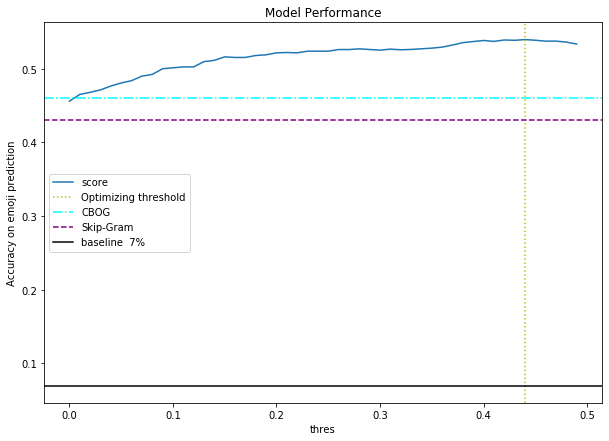

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
df2.plot(x="thres",ax=ax, label="Ensemble model")
ax.axvline(0.44,label="Optimizing threshold", c="y", ls=":")
ax.axhline(.4602,label="CBOG", c="aqua", ls="-.")
ax.axhline(0.4302,label="Skip-Gram",c="purple", ls="--")
ax.axhline(0.07,label="baseline  7%",c="k")
ax.set_ylabel("Accuracy on emoji prediction")
ax.set_title("Model Performance")
ax.legend()

In [73]:
# if p1 in l1
thres_arr = np.linspace(0.80,1,21)
for thres in thres_arr:
    print(thres, word2vec_score_emsemble(val_dict,model1_1, model2_2, thres)[:2])

0.8 (0.30633608815427, 0.3850415512465374)
0.81 (0.30633608815427, 0.3847750865051903)
0.8200000000000001 (0.30578512396694213, 0.38408304498269896)
0.8300000000000001 (0.30578512396694213, 0.38408304498269896)
0.8400000000000001 (0.30578512396694213, 0.38408304498269896)
0.8500000000000001 (0.30578512396694213, 0.38408304498269896)
0.86 (0.30578512396694213, 0.38408304498269896)
0.87 (0.30578512396694213, 0.38408304498269896)
0.88 (0.30578512396694213, 0.38408304498269896)
0.89 (0.30578512396694213, 0.38408304498269896)
0.9 (0.30578512396694213, 0.38408304498269896)
0.91 (0.30578512396694213, 0.38408304498269896)
0.92 (0.30578512396694213, 0.38408304498269896)
0.93 (0.30578512396694213, 0.38408304498269896)
0.9400000000000001 (0.30578512396694213, 0.38408304498269896)
0.95 (0.30578512396694213, 0.38408304498269896)
0.96 (0.30578512396694213, 0.38408304498269896)
0.97 (0.30578512396694213, 0.38408304498269896)
0.98 (0.30578512396694213, 0.38408304498269896)
0.99 (0.30578512396694213, 0

In [86]:
word2vec_weighted_score(val_dict, model1, emoji_frequency)    # CBOW good at predicting more frequent word (high weight)

0.267386829730014

In [87]:
word2vec_weighted_score(val_dict, model2, emoji_frequency)

0.06241611360445485

In [89]:
def word2vec_weighted_score_ensemble(val_dict, model1, model2, thres, emoji_frequency):
    total_words = 0
    total_weighted = 0
    correct_weighted = 0
#     words = []
    word_vectors = model1.wv
    for word in val_dict:
        if word:
            w = word.lower()
#             words.append(w)
            if w in word_vectors:
                total_words += 1
                prediction = ensemble_emoji_prodictor(w, model1, model2, thres)
                if prediction in val_dict[word]:
                    correct_weighted += emoji_frequency[prediction]
                    total_weighted += emoji_frequency[prediction]
                elif prediction in emoji_list:
                    total_weighted += emoji_frequency[prediction]
    return correct_weighted/total_weighted

In [90]:
word2vec_weighted_score_ensemble(val_dict, model1, model2, 0.06, emoji_frequency)

0.09934862490553567

In [91]:
# if p1 in l1
thres_arr = np.linspace(0.01,0.20,20)
for thres in thres_arr:
    print(word2vec_weighted_score_ensemble(val_dict, model1, model2, thres, emoji_frequency))

0.08474481924748074
0.09006502653848159
0.09479537639495465
0.09471136964476934
0.09519971373942336
0.09934862490553567
0.10045718196569688
0.10347345581361085
0.10329134014169694
0.10327865628196051
0.10330389100633897
0.10388116539603176
0.10619495618015533
0.10655389009358177
0.11036054258964167
0.11017199038168167
0.11088114427920304
0.11100778048100647
0.11247291178759795
0.11263821026961353


In [96]:
s1 = "Head shoulders knees and toes knees and toes"
s2 = "And eyes and ears and mouth and mouth and nose"

In [98]:
for w in s1.lower().split(" "):
    print(emoji_prodictor(w, model1))
for w in s2.lower().split(" "):
    print(emoji_prodictor(w, model1))

head
shoulders
knees
😊
🍆
knees
😊
🍆
😊
eyes
😊
ears
😊
🍆
😊
🍆
😊
nose


In [99]:
for w in s1.lower().split(" "):
    print(emoji_prodictor(w, model2))
for w in s2.lower().split(" "):
    print(emoji_prodictor(w, model2))

head
💁🏾
🙇🏽‍♀️
😂
💅
🙇🏽‍♀️
😂
💅
😂
eyes
😂
ears
😂
🙇🏾‍♀️
😂
🙇🏾‍♀️
😂
nose


-------------------------
# RNN model

In [111]:
with open('emoji_100k.txt', 'r') as file:
    text = file.read().lower()
print('text length', len(text))
chars = sorted(list(set(text))) # getting all unique chars
print('total chars: ', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

text length 5835178
total chars:  2338


RNN model not working here since RNN requires a large X matrix, with 3 dimension as (num_of_lines * window_size * num_of_chars)
Since we have a very large num_of_char and lots of num_of_lines. It requires hundreds of gigabytes memory to run each for a small sample.

In [112]:
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

MemoryError: Unable to allocate 169. GiB for an array with shape (1945046, 40, 2338) and data type bool

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss',
                             verbose=1, save_best_only=True,
                             mode='min')

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=1, min_lr=0.001)
callbacks = [print_callback, checkpoint, reduce_lr]

In [ ]:
model.fit(x, y, batch_size=128, epochs=5, callbacks=callbacks)

In [ ]:
def generate_text(length, diversity):
    # Get random starting text
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    for i in range(length):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char
    return generated

In [ ]:
print(generate_text(500, 0.2)

In [109]:
s= "👍"

In [110]:
s[0]

'👍'